In [1]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import math
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction')
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Skipping, found downloaded files in ".\google-stock-prediction" (use force=True to force download)


In [3]:
!pip install tensorflow


In [23]:
data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Google_Stock_Price_Train.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [25]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [27]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [28]:
x_train=[]
y_train=[]

for i in range(60,1149): #60 : timestep //1149 : Length of the data
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)


In [29]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

(1089, 60, 1)

In [30]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")





C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:

hist = model.fit(x_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - 264ms/step - loss: 0.0340
Epoch 2/20
35/35 - 7s - 189ms/step - loss: 0.0120
Epoch 3/20
35/35 - 5s - 151ms/step - loss: 0.0094
Epoch 4/20
35/35 - 4s - 126ms/step - loss: 0.0079
Epoch 5/20
35/35 - 3s - 99ms/step - loss: 0.0074
Epoch 6/20
35/35 - 4s - 111ms/step - loss: 0.0079
Epoch 7/20
35/35 - 4s - 106ms/step - loss: 0.0069
Epoch 8/20
35/35 - 4s - 104ms/step - loss: 0.0067
Epoch 9/20
35/35 - 4s - 107ms/step - loss: 0.0074
Epoch 10/20
35/35 - 4s - 112ms/step - loss: 0.0056
Epoch 11/20
35/35 - 4s - 102ms/step - loss: 0.0054
Epoch 12/20
35/35 - 4s - 111ms/step - loss: 0.0058
Epoch 13/20
35/35 - 4s - 109ms/step - loss: 0.0056
Epoch 14/20
35/35 - 4s - 101ms/step - loss: 0.0054
Epoch 15/20
35/35 - 4s - 100ms/step - loss: 0.0052
Epoch 16/20
35/35 - 3s - 99ms/step - loss: 0.0049
Epoch 17/20
35/35 - 4s - 105ms/step - loss: 0.0047
Epoch 18/20
35/35 - 4s - 109ms/step - loss: 0.0043
Epoch 19/20
35/35 - 4s - 104ms/step - loss: 0.0069
Epoch 20/20
35/35 - 4s - 107ms/step - loss

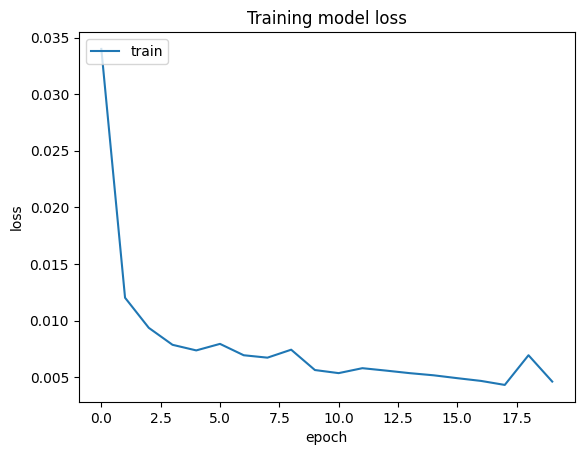

In [32]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [83]:
testData = pd.read_csv('C:\Users\dell\Desktop\AMZN')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData =testData.dropna()
testData =testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]),1)
x_test.shape



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (903435792.py, line 1)

In [81]:
y_pred = model.predict(x_test)
y_pred

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


array([[0.4063852 ],
       [0.4117901 ],
       [0.41388077],
       ...,
       [0.75692034],
       [0.75302154],
       [0.74842846]], dtype=float32)

In [79]:
predicted_price = sc.inverse_transform(y_pred)

In [24]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   -------------------------------------- - 92.2/96.5 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00


In [14]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ----------------- ---------------------- 112.6/250.9 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 3.1 MB/s eta 0:00:00


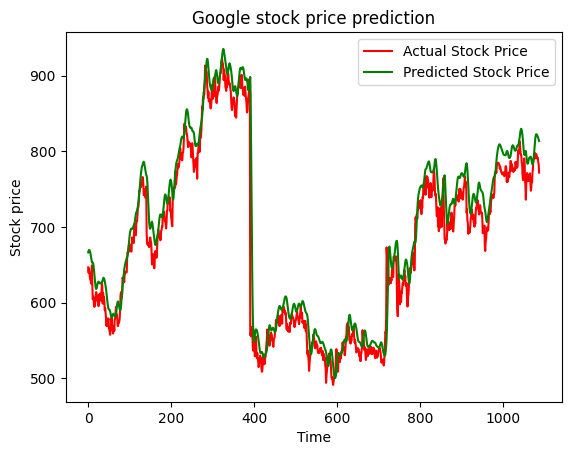

In [82]:
plt.plot(y_test, color = 'red',label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()

In [21]:
!pip install opendatasets 

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/82.1 kB ? eta -:--:--
     ---------------------------------------- 82.1/82.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ---------------------------------------- 78.2/78.2 kB 2.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105130 sha256=5547d91863752b2169f538db7cc1426815503dd65e6e7b84f4aaafba2398d5a5
  Stored in directory: c:\users\de